In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import numpy as np
import glob

In [30]:
files = (glob.glob('***')) # omitted for privacy reasons

In [34]:
Xs = []
for file in files:
    im = io.imread(file)
    Xs.append(im)

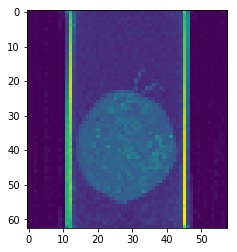

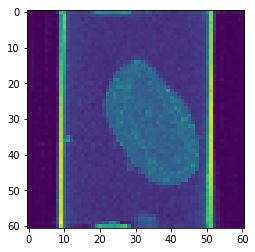

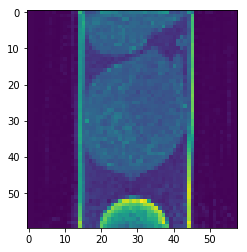

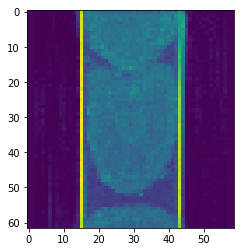

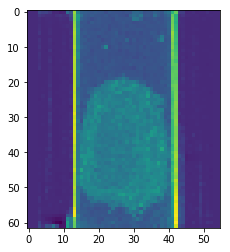

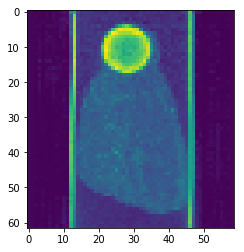

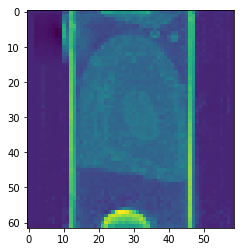

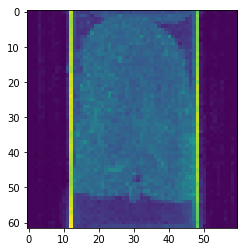

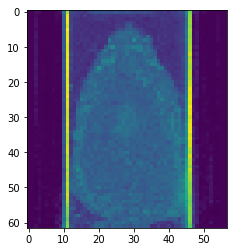

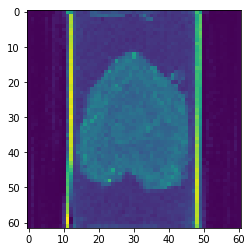

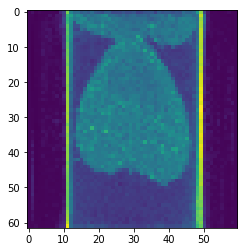

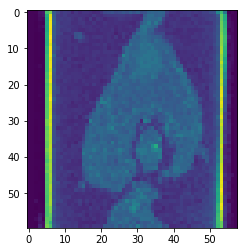

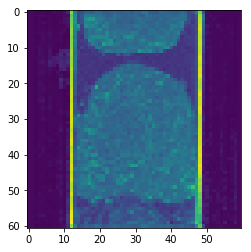

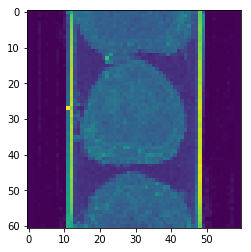

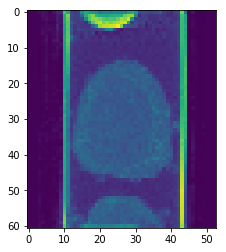

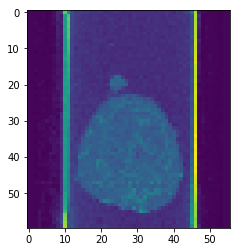

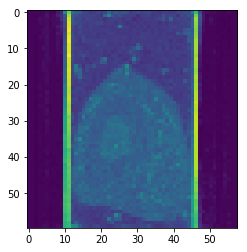

In [48]:
# 150 - 300
for i in range(len(Xs)):
    plt.imshow(Xs[i][300][::8,::8])
    plt.show()

In [59]:
a = 2
a//2

1

In [89]:
X = []
for x in Xs:
    im = x[150:300,::8,::7]
    _,xx,yy = im.shape
    fix_x = xx-60
    fix_y = yy-60
    if (fix_x%2==1):
        im = im[:,fix_x//2:-(fix_x//2+1)]
    elif (fix_x>0):
        im = im[:,fix_x//2:-(fix_x//2)]
    if (fix_y%2==1):
        im = im[:,:,fix_y//2:-(fix_y//2+1)]
    elif (fix_y>0):
        im = im[:,:,fix_y//2:-(fix_y//2)]
    X.append(im)

In [90]:
X = np.concatenate((X))

In [93]:
X[0].ravel().shape

(3600,)

In [104]:
X = X - X.min()
X = X/X.max()

In [114]:
X_train = np.zeros((len(X),3600))

for i in range(len(X)):
    X_train[i] = X[i].flatten()

In [115]:
X_train.shape

(2550, 3600)

In [116]:
from keras.models import Sequential
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Conv2DTranspose, UpSampling2D

In [117]:
model = Sequential()

In [118]:
model = Sequential()
model.add(Dense(1024, input_dim=3600, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(3600, activation='sigmoid'))

model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
model.fit(X_train,X_train,batch_size=10,epochs=10)

Epoch 1/10
2550/2550 [==============================] - 35s 14ms/step - loss: 4947.6272 - acc: 0.0902
Epoch 2/10
2550/2550 [==============================] - 34s 13ms/step - loss: 4947.4735 - acc: 0.0976
Epoch 3/10
2290/2550 [=========================>....] - ETA: 3s - loss: 4947.0464 - acc: 0.1009